## Coast Train metadata plots: geographic distribution

Import libraries

In [34]:
# ! conda install cartopy -y

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cartopy import config
import cartopy.crs as ccrs

Read data

In [3]:
A = pd.read_csv('metadata/A_naip_meta_served.csv')
B = pd.read_csv('metadata/B_quads_gulf_meta_served.csv')
C = pd.read_csv('metadata/C_s2_meta_served.csv')
D = pd.read_csv('metadata/D_s2_4classes_meta_served.csv')
E = pd.read_csv('metadata/E_L8_meta_all_served.csv')
F = pd.read_csv('metadata/F_elwha_l8_served.csv')
G = pd.read_csv('metadata/G_madeira_meta_served.csv')
H = pd.read_csv('metadata/H_dauphin_meta_served.csv')
I = pd.read_csv('metadata/I_sandwich_metadata_served.csv')
J = pd.read_csv('metadata/J_naip_6class_meta_served.csv')

In [ ]:
#number of unique sites

In [30]:
names = [
    'A: NAIP',
    'B: Quads',
    'C: S2',
    'D: S2-4class',
    'E: Landsat-8',
    'F: Landsat-8-Elwha',
    'G: Madeira',
    'H: Dauphin',
    'I: Sandwich',
    'J: NAIP-6class'
]

In [71]:
lons = []
lats = []
for counter,(dat,name) in enumerate(zip([A,B,C,D,E,F,G,H,I,J], names)):
    lons.append(dat['LonMin'])
    lats.append(dat['LatMin'])

lats = np.hstack(lats)
lons = np.hstack(lons)




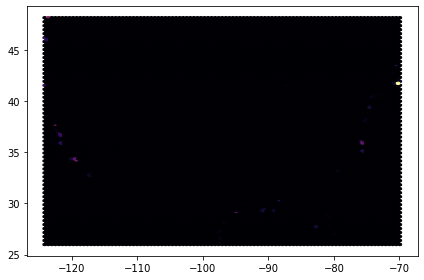

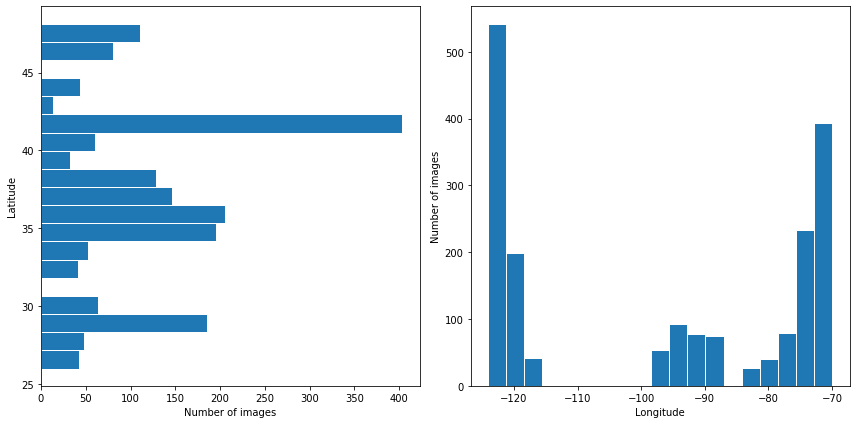

In [76]:
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(lats, bins=np.linspace(np.min(lats), np.max(lats), 20), orientation="horizontal", edgecolor='white', linewidth=1)
plt.xlabel('Number of images')
plt.ylabel('Latitude')

plt.subplot(122)
plt.hist(lons, bins=np.linspace(np.min(lons), np.max(lons), 20), edgecolor='white', linewidth=1)
plt.ylabel('Number of images')
plt.xlabel('Longitude')

plt.savefig('All_imagery_by_lat_and_lon.png',dpi=200, bbox_inches='tight')    


In [ ]:
# heatmap in space

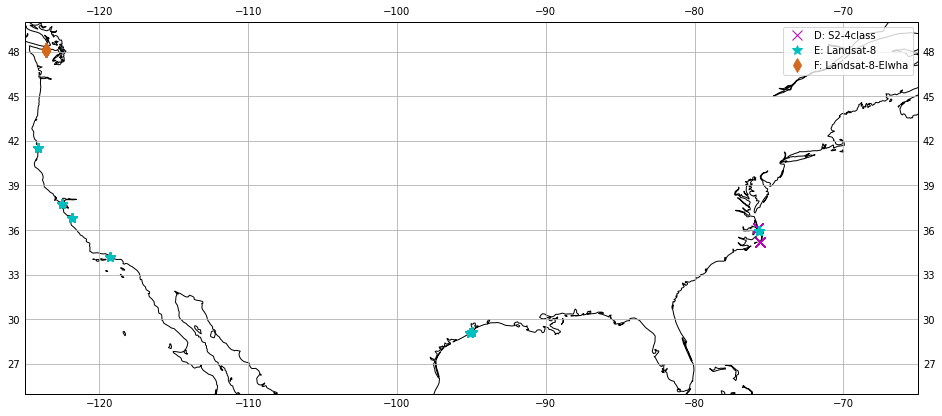

In [53]:
crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True)

plt.plot(D['LonMin'],D['LatMin'],'mx', label=names[3], markersize=10)
plt.plot(E['LonMin'],E['LatMin'],'c*', label=names[4], markersize=10)
plt.plot(F['LonMin'],F['LatMin'],'d', color='chocolate', label=names[5], markersize=10)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.suptitle('Satellite Imagery')

plt.savefig('Map_satellite_imagery.png',dpi=200, bbox_inches='tight')    


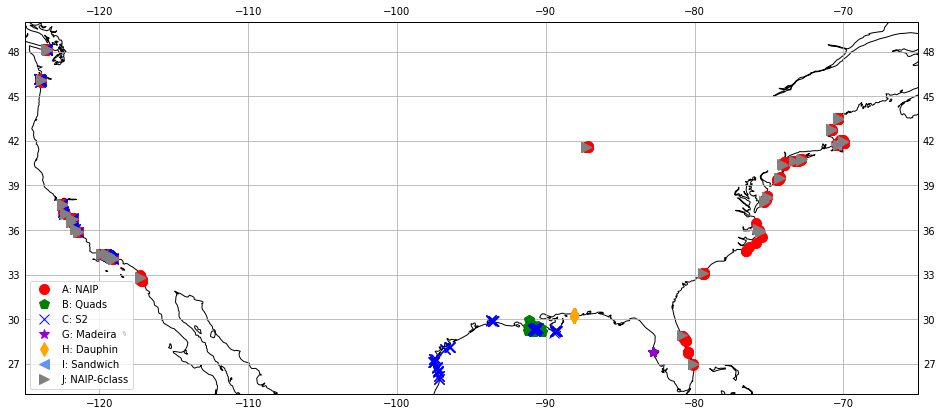

In [54]:
crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True)

plt.plot(A['LonMin'],A['LatMin'],'ro', label=names[0], markersize=10)
plt.plot(B['LonMin'],B['LatMin'],'gp', label=names[1], markersize=10)
plt.plot(C['LonMin'],C['LatMin'],'bx', label=names[2], markersize=10)
plt.plot(G['LonMin'],G['LatMin'],'*', color='darkviolet', label=names[6], markersize=10)
plt.plot(H['LonMin'],H['LatMin'],'d', color='orange', label=names[7], markersize=10)
plt.plot(I['LonMin'],I['LatMin'],'<', color='cornflowerblue', label=names[8], markersize=10)
plt.plot(J['LonMin'],J['LatMin'],'>', color='grey', label=names[9], markersize=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# plt.suptitle('Orthomosaic Imagery')

plt.savefig('Map_orthomosaic_imagery.png',dpi=200, bbox_inches='tight')    


In [55]:
! montage Map_orthomosaic_imagery.png Map_satellite_imagery.png -geometry 2618x1157+20+20 -tile 1x2 Merged_maps.png

/home/marda/anaconda3/envs/coastsat/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


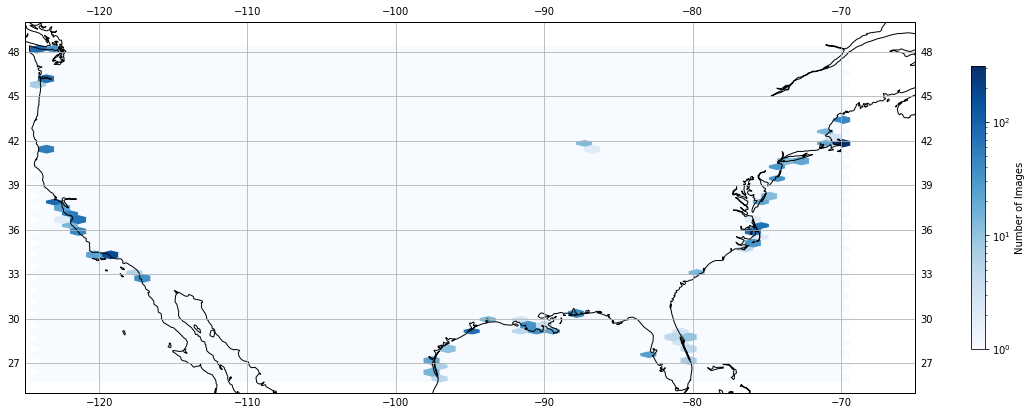

In [103]:
crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
plt.hexbin(lons, lats, gridsize=50, bins='log',cmap='Blues')
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='k')
ax.gridlines(draw_labels=True)

cbar=plt.colorbar(shrink=0.25)
cbar.set_label('Number of Images')
plt.savefig('Heatmap_all_imagery.png',dpi=200, bbox_inches='tight')    


In [15]:


# fig = plt.figure(figsize=(8, 12))

# # get the path of the file. It can be found in the repo data directory.
# fname = os.path.join(config["repo_data_dir"],
#                      'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
#                      )
# img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
# img = plt.imread(fname)

# ax = plt.axes(projection=ccrs.PlateCarree())
# plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
#           '2012 09/26/2012 20:50 UTC')

# ax.use_sticky_edges = False
# # set a margin around the data
# ax.set_xmargin(0.05)
# ax.set_ymargin(0.10)

# # add the image. Because this image was a tif, the "origin" of the image is in the
# # upper left corner
# ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
# ax.coastlines(resolution='50m', color='black', linewidth=1)

# # mark a known place to help us geo-locate ourselves
# ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
# ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

# plt.show()